In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import sys

sys.path.append("../scripts")
from XGBoost import PortfolioPredictionXGBoost_value
from LSTM_utils import compute_errors

# Import des données

In [2]:
titres = {"Amazon": pd.read_csv("../data/AMZN.csv"),
          "Berkshire": pd.read_csv("../data/BRK-B.csv"),
          "Google": pd.read_csv("../data/GOOG.csv"),
          "Microsoft": pd.read_csv("../data/MSFT.csv"),
          "Exxon": pd.read_csv("../data/XOM.csv")}

# Modélisation

In [3]:
XGB = PortfolioPredictionXGBoost_value(titres, 
                                       window_size = 90, 
                                       horizon_prev = 7, 
                                       test_size = 0.8)

In [4]:
predictions, ptf_avg = XGB.predict_avg_portfolio()

100%|██████████| 5/5 [15:44<00:00, 188.83s/it]


# Résultats

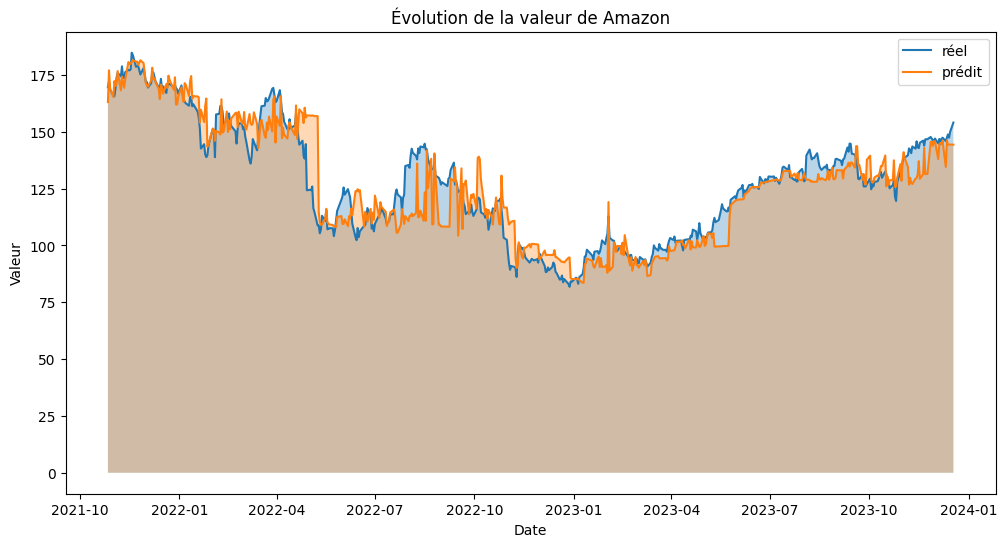

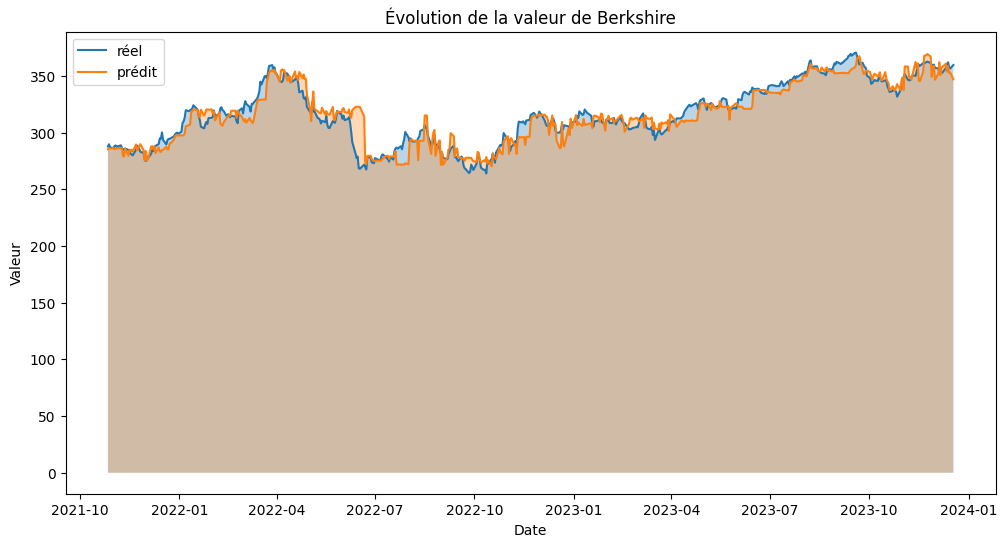

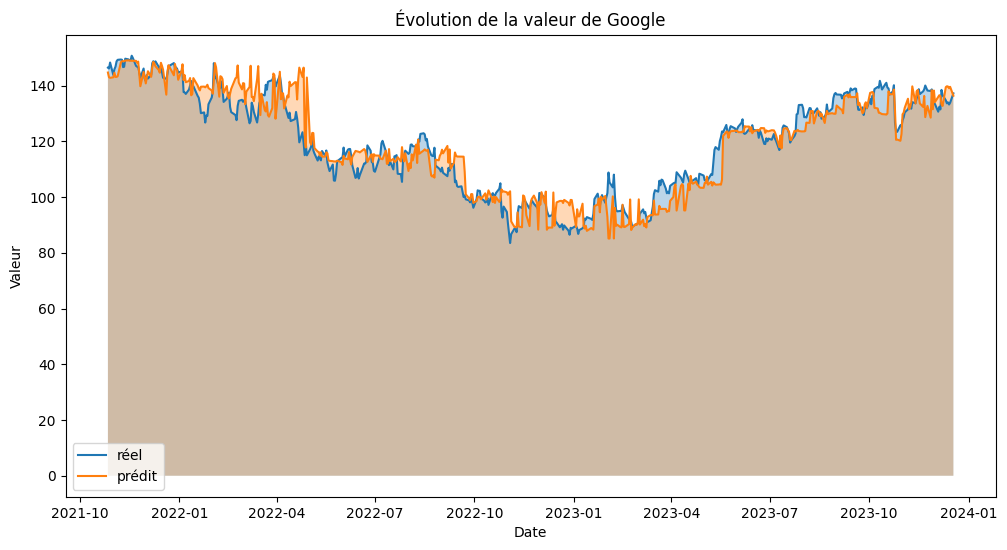

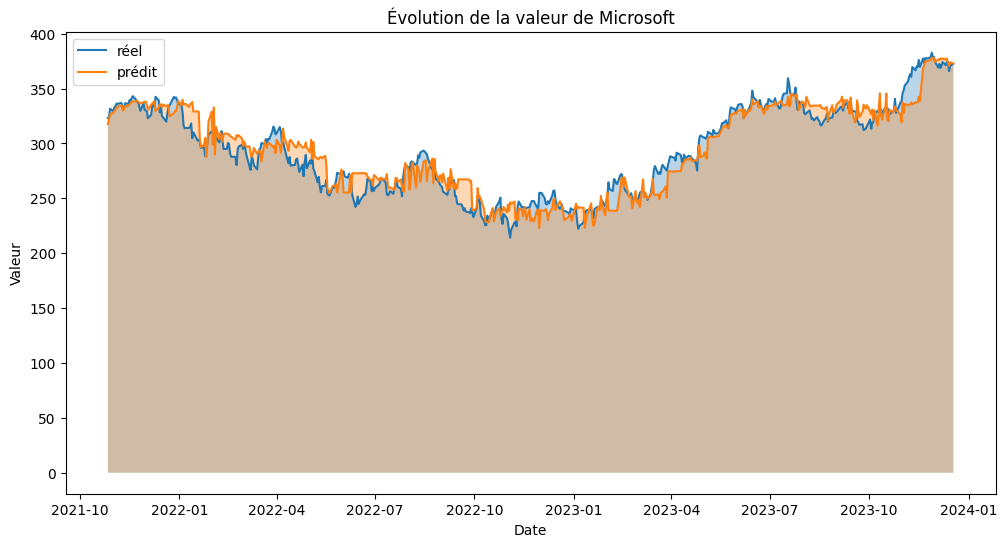

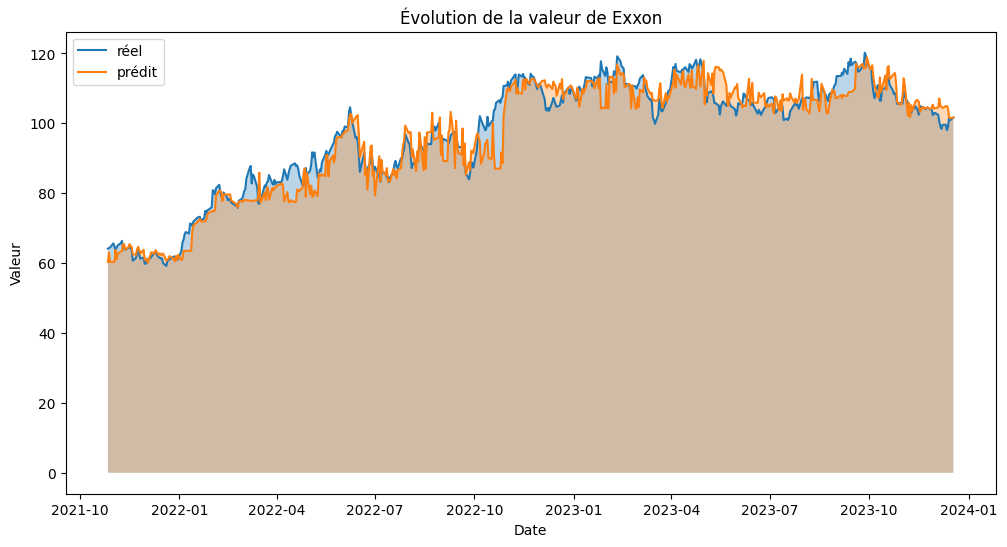

In [9]:
for key, value in predictions.items() :
    fig = plt.figure(figsize=(12, 6))
    
    # Plot the 'Close' values
    plt.plot(value.Date, value['Close'], label='réel')
    plt.fill_between(value.Date, value['Close'], alpha=0.3)
    
    # Plot the 'Prediction' values
    plt.plot(value.Date, value['Prediction'], label='prédit')
    plt.fill_between(value.Date, value['Prediction'], alpha=0.3)
    
    # Set the title and axis labels
    plt.title(f"Évolution de la valeur de {key}")
    plt.xlabel('Date')
    plt.ylabel('Valeur')
    
    # Add a legend
    plt.legend()
    
    # Show the plot
    plt.show()

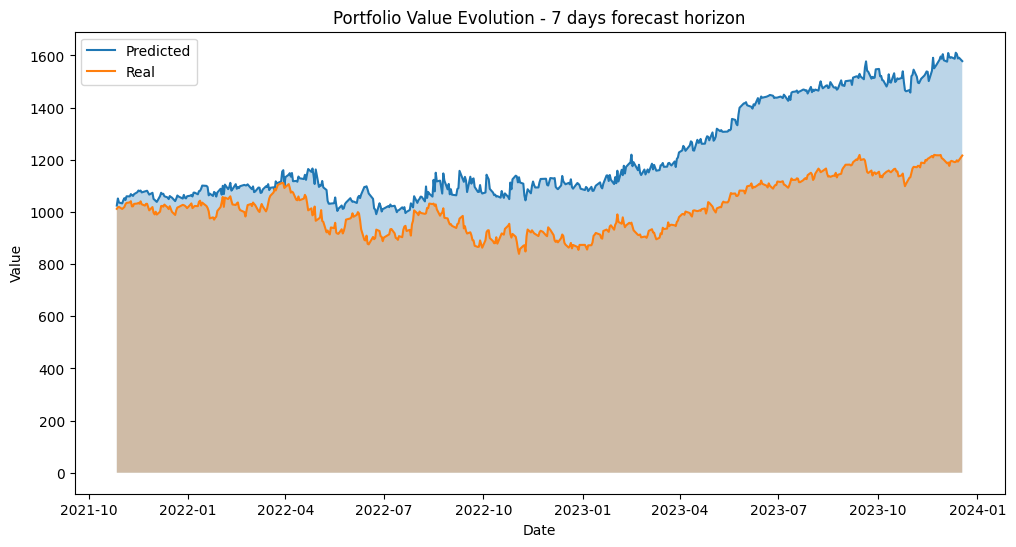

In [10]:
fig = plt.figure(figsize=(12, 6))

plt.plot(ptf_avg.Date, ptf_avg['Predicted_Portfolio_Value'], label='Predicted')
plt.fill_between(ptf_avg.Date, ptf_avg['Predicted_Portfolio_Value'], alpha=0.3)

plt.plot(ptf_avg.Date, ptf_avg['Real_Portfolio_Value'], label='Real')
plt.fill_between(ptf_avg.Date, ptf_avg['Real_Portfolio_Value'], alpha=0.3)

plt.title(f"Portfolio Value Evolution - 7 days forecast horizon")
plt.xlabel('Date')
plt.ylabel('Value')

plt.legend()
plt.show()

# Erreurs

In [11]:
errors = compute_errors(predictions, ptf_avg)

In [12]:
errors

,MSE,RMSE,MAE
Portfolio,51453.150755,226.832870,194.917672
Amazon,99.083061,9.954047,6.827162
Berkshire,85.867586,9.266476,6.567959
Google,39.043462,6.248477,4.475306
Microsoft,156.735149,12.519391,9.562079
Exxon,21.612677,4.648944,3.428266
